In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('/content/daily_offers.xlsx')
data.head(10)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
5,FE372230-29B1-4A29-BB73-CB9D3078C286,20210401.0,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,0000000000000000000000000000000000102325,1668701718,20210401.0,983.00
6,E1B47219-42C8-411D-AE46-AD5256DC4757,20210401.0,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,NBW_L+_A_1125_0.4,611993,20210701.0,18.00
7,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,20210401.0,113.387124,30342192.0,32.0,Won,W,41.0,0.68,1220.0,0000000000000000000000000000000001000944,611993,20210101.0,931.00
8,2851F48B-DA32-4DF3-884B-17A3100DD65A,20210401.0,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,0000000000000000000000000000000000106786,1668701376,20210701.0,1363.00
9,6E4D638C-A820-4A40-836F-C9D48BC65528,20210401.0,630.626917,30202938.0,25.0,Won,W,41.0,1.50,1165.0,0000000000000000000000000000000000102325,1668701718,20210401.0,983.00


In [3]:
data.shape

(181673, 14)

In [4]:
data.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [5]:
data['quantity tons'] = pd.to_numeric(data['quantity tons'], errors='coerce')
data['item_date'] = pd.to_datetime(data['item_date'], format='%Y%m%d', errors='coerce')
data['delivery date'] = pd.to_datetime(data['delivery date'],format='%Y%m%d', errors='coerce')

In [6]:
data['application'] = data['application'].astype('category')
data['country'] = data['country'].astype('category')

In [7]:
data['item_date'] = data['item_date'].dt.strftime("%Y-%m-%d")
data['delivery date'] = data['delivery date'].dt.strftime("%Y-%m-%d")

In [8]:
data.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [9]:
#Since the proportion of null values in the material ref is really long we can drop the column
data = data.drop('material_ref', axis=1)

In [10]:
#Since the number of null values in the rest of the columns is relatively low we can drop those rows
data = data.dropna()

<Axes: >

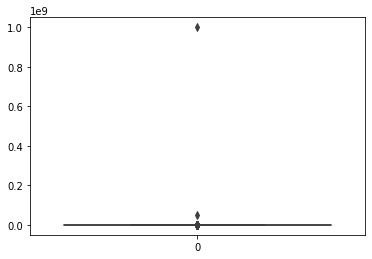

In [11]:
sns.boxplot(data['quantity tons'])

In [12]:
# create a subset of data with the desired condition
subset_data_1 = data[(data['quantity tons'] < 0) & (data['quantity tons'] > 10000)]

# calculate the mean of the 'quantity tons' column from the subset data
mean_quantity_tons = subset_data_1['quantity tons'].mean()

# set the new value in the column using .loc
data.loc[(data['quantity tons'] < 0) & (data['quantity tons'] > 10000), 'quantity tons'] = mean_quantity_tons

<Axes: >

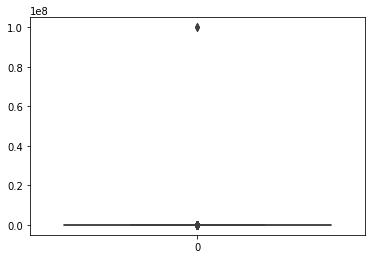

In [13]:
sns.boxplot(data['selling_price'])

In [14]:
#Most of the selling prices lie between 0 and 3000
subset_data = data[(data['selling_price'] >= 0) & (data['selling_price'] <= 3000)]
mean_selling_price = subset_data_1['selling_price'].mean()
data.loc[(data['selling_price'] < 0) & (data['selling_price'] > 3000), 'selling_price'] = mean_selling_price

In [15]:
print("The number of unique customers: ",len(data.customer.unique()))
print("The number of unique countries: ",len(data.country.unique()))
print("The number of unique applications: ",len(data.application.unique()))
print("The number of unique status: ",len(data.status.unique()))
print("The number of unique item type: ",len(data['item type'].unique()))
print("The number of unique thickness: ",len(data['thickness'].unique()))
print("The number of unique width: ",len(data['width'].unique()))
print('Unique item dates: ', len(data['item_date'].unique()))
print('Unique delivery dates: ', len(data['delivery date'].unique()))

The number of unique customers:  1167
The number of unique countries:  17
The number of unique applications:  30
The number of unique status:  9
The number of unique item type:  7
The number of unique thickness:  594
The number of unique width:  1386
Unique item dates:  250
Unique delivery dates:  26


In [16]:
#Categories of item type
data['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [17]:
#Categories of status
data.status.unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [18]:
#The item date ranges from 2020-07-02 to 2021-04-01
print(sorted(data['item_date'].unique()))

['2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-12', '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06', '2020-08-07', '2020-08-09', '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-22', '2020-08-24', '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28', '2020-08-29', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04', '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11', '2020-09-13', '2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17', '2020

In [19]:
#The delivery date ranges from 2019-04-01 to 2022-01-01
print(sorted(data['delivery date'].unique()))

['2019-04-01', '2019-07-01', '2019-10-01', '2020-01-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01']


In [20]:
data['country'].value_counts()

78.0     32083
26.0     27514
25.0     23361
27.0     21508
32.0     18658
28.0     15821
84.0     12776
77.0      9713
30.0      8702
39.0      3730
79.0      2742
38.0      1712
40.0      1683
80.0       817
113.0      714
89.0        92
107.0        5
Name: country, dtype: int64

In [21]:
data['application'].value_counts()

10.0    77534
41.0    46259
15.0    20771
59.0     8925
42.0     5857
56.0     4846
29.0     1937
27.0     1784
26.0     1650
28.0     1591
40.0     1576
25.0     1498
79.0     1422
22.0     1023
20.0      768
66.0      718
3.0       657
38.0      511
58.0      447
4.0       285
39.0      267
65.0      247
67.0      221
68.0      181
99.0      146
19.0      143
69.0      122
5.0       110
70.0      101
2.0        34
Name: application, dtype: int64

In [22]:
e = data['status'].value_counts()
e

Won                116004
Lost                34431
Not lost for AM     19568
Revised              4276
To be approved       4167
Draft                3121
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Won'),
  Text(1, 0, 'Lost'),
  Text(2, 0, 'Not lost for AM'),
  Text(3, 0, 'Revised'),
  Text(4, 0, 'To be approved'),
  Text(5, 0, 'Draft'),
  Text(6, 0, 'Offered'),
  Text(7, 0, 'Offerable'),
  Text(8, 0, 'Wonderful')])

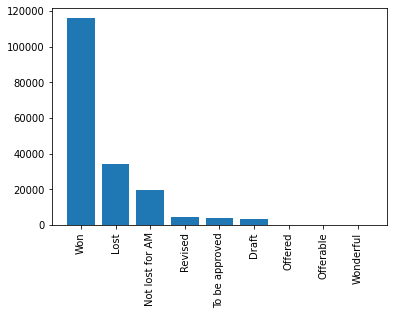

In [23]:
plt.bar(e.index,e.values)
plt.xticks(rotation=90)

In [24]:
data['delivery date'].value_counts().head(15)

2021-01-01    33006
2021-04-01    31957
2020-10-01    25388
2021-07-01    21079
2021-05-01     9118
2021-03-01     8848
2020-07-01     7706
2020-12-01     7529
2021-02-01     7291
2020-11-01     7179
2021-06-01     7004
2020-09-01     6131
2020-08-01     4865
2021-08-01     3748
2021-09-01      332
Name: delivery date, dtype: int64

In [25]:
f=data['item type'].value_counts()
f

W         105607
S          69202
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: item type, dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'W'),
  Text(1, 0, 'S'),
  Text(2, 0, 'PL'),
  Text(3, 0, 'Others'),
  Text(4, 0, 'WI'),
  Text(5, 0, 'IPL'),
  Text(6, 0, 'SLAWR')])

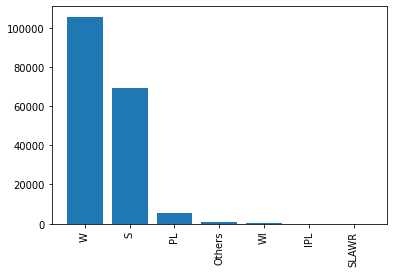

In [26]:
plt.bar(f.index,f.values)
plt.xticks(rotation=90)

In [27]:
data[data.duplicated()]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price


In [28]:
a = data.groupby(['item type'])['selling_price'].aggregate('mean').reset_index().sort_values(by='selling_price',ascending=False)
a

,item type,selling_price
2,PL,18382.456164
3,S,2247.200587
4,SLAWR,1195.000000
5,W,833.646319
0,IPL,778.907407
1,Others,748.082885
6,WI,690.747118


Text(0.5, 0, 'Top Selling Item Types')

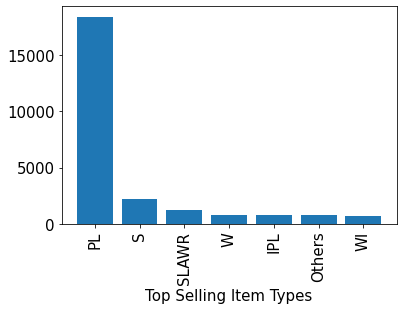

In [29]:
plt.rcParams.update({'font.size':15})
plt.bar(a['item type'],a['selling_price'])
plt.xticks(rotation=90)
plt.xlabel('Top Selling Item Types')

In [30]:
b = data.groupby(['status'])['selling_price'].aggregate('mean').reset_index().sort_values(by='selling_price',ascending=False)
b

,status,selling_price
6,To be approved,24928.037874
2,Not lost for AM,5956.637700
8,Wonderful,1136.000000
4,Offered,1017.358491
3,Offerable,951.000000
5,Revised,855.863548
7,Won,831.418116
1,Lost,806.730280
0,Draft,16.550785


Text(0.5, 0, 'Top Status Items')

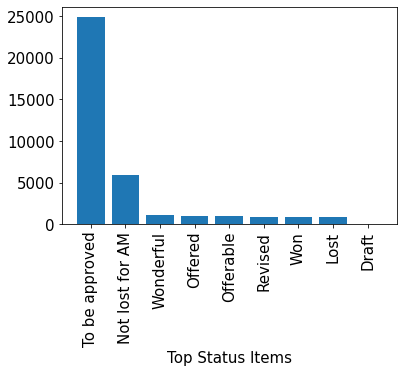

In [31]:
plt.rcParams.update({'font.size':15})
plt.bar(b['status'],b['selling_price'])
plt.xticks(rotation=90)
plt.xlabel('Top Status Items')

In [32]:
c = data.groupby(['application'])['selling_price'].aggregate('mean').reset_index().sort_values(by='selling_price',ascending=False)[:10]
c

,application,selling_price
19,56.0,21343.607326
4,10.0,2078.979129
29,99.0,1097.883562
14,38.0,935.782779
17,41.0,924.224447
18,42.0,908.294624
28,79.0,888.394388
27,70.0,860.940594
22,65.0,856.825911
0,2.0,844.500000


Text(0.5, 0, 'Top Selling Item Types')

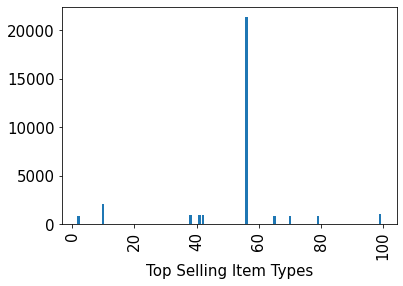

In [33]:
plt.rcParams.update({'font.size':15})
plt.bar(c['application'],c['selling_price'])
plt.xticks(rotation=90)
plt.xlabel('Top Selling Item Types')

In [34]:
d = data.groupby(['country'])['selling_price'].aggregate('mean').reset_index().sort_values(by='selling_price',ascending=False)[:10]
d

,country,selling_price
15,107.0,2.000071e+07
2,27.0,5.468702e+03
16,113.0,1.139157e+03
6,38.0,8.696501e+02
13,84.0,8.693348e+02
4,30.0,8.440281e+02
0,25.0,8.379213e+02
5,32.0,8.339787e+02
3,28.0,8.236161e+02
1,26.0,8.077374e+02


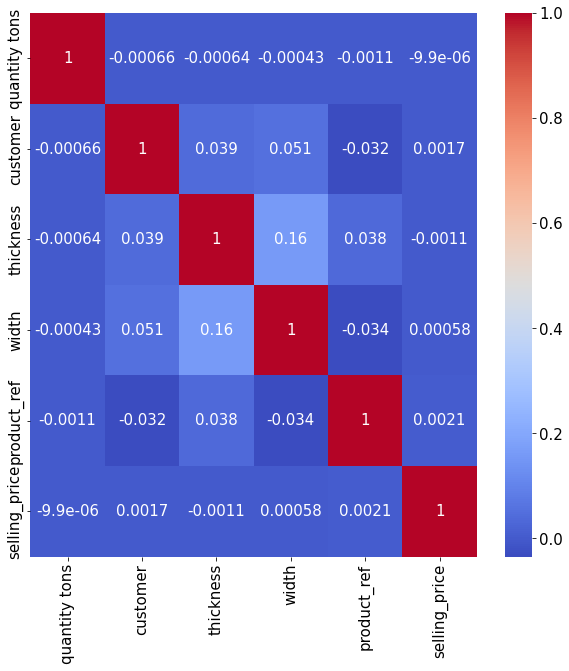

In [35]:
# create a heatmap with larger size
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit and transform the categorical feature
status_encoded = le.fit_transform(data['status'])
item_type_encoded = le.fit_transform(data['item type'])

In [37]:
data['status_encoded'] = status_encoded
data['item_type_encoded'] = item_type_encoded

In [38]:
data=data.drop(['status','item type'],axis=1)

In [40]:
x = data[['quantity tons','customer','country','application', 'thickness', 'width', 'product_ref','status_encoded','item_type_encoded']]
y = data['selling_price']

In [41]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# feature extraction
model = LinearRegression()
rfe = RFE(model)
fit = rfe.fit(x,y)

 'quantity tons','customer','country','application', 'thickness', 'width', 'product_ref','status_encoded','item_type_encoded'

In [42]:
fit.ranking_

array([5, 4, 1, 2, 1, 3, 6, 1, 1])

In [43]:
x = data[['country','application', 'thickness', 'width','status_encoded','item_type_encoded']]

In [44]:
from sklearn.preprocessing import StandardScaler
# Scale features
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

In [47]:
y_pred_1=model_1.predict(X_test)

In [48]:
from sklearn.metrics import r2_score, mean_absolute_error

# calculate the R-squared score of the model
r2_score_1 = r2_score(y_test,y_pred_1)

# print the R-squared score
print('R-squared:', r2_score_1)

R-squared: -156.58214639061848


In [49]:
mae_1 = mean_absolute_error(y_test, y_pred_1)
print('Mean Absolute Error: ', mae_1)

Mean Absolute Error:  2311.948813383276


In [50]:
from sklearn.linear_model import Ridge

model_2 = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model_2.fit(X_train, y_train)

Ridge(alpha=100, random_state=42, solver='cholesky')

In [51]:
y_pred_2 = model_2.predict(X_test)

In [52]:
# calculate the R-squared score of the model
r2_score_2 = r2_score(y_test,y_pred_2)

# print the R-squared score
print('R-squared:', r2_score_2)

R-squared: -156.39329467617662


In [53]:
mae_1 = mean_absolute_error(y_test, y_pred_2)
print('Mean Absolute Error: ', mae_1)

Mean Absolute Error:  2310.567196338539


In [54]:
from sklearn.linear_model import Lasso

model_3 = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model_3.fit(X_train, y_train)

Lasso(alpha=0.1, positive=True, precompute=True, random_state=42,
      selection='random')

In [55]:
y_pred_3=model_3.predict(X_test)

In [56]:
# calculate the R-squared score of the model
r2_score_3 = r2_score(y_test,y_pred_3)

# print the R-squared score
print('R-squared:', r2_score_3)

R-squared: -62.35360159325176


In [57]:
from sklearn.linear_model import ElasticNet

model_4 = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model_4.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=42, selection='random')

In [58]:
y_pred_4=model_4.predict(X_test)

In [59]:
# calculate the R-squared score of the model
r2_score_4 = r2_score(y_test,y_pred_4)

# print the R-squared score
print('R-squared:', r2_score_4)

R-squared: -153.531582853749


In [60]:
from sklearn.ensemble import RandomForestRegressor

model_5 = RandomForestRegressor(n_estimators=10)
model_5.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [61]:
y_pred_5 = model_5.predict(X_test)

In [62]:
# calculate the R-squared score of the model
r2_score_5 = r2_score(y_test,y_pred_5)

# print the R-squared score
print('R-squared:', r2_score_5)

R-squared: -2147338.3264869372


In [63]:
model_evaluation = pd.DataFrame({'Models':['Linear Regression','Ridge Regression','Lasso Regression','Elastic Net', 'Random Forest Regressor'],
                                 'R-Squared value':[r2_score_1,r2_score_2,r2_score_3,r2_score_4,r2_score_5]})

In [64]:
model_evaluation.sort_values(by='R-Squared value',ascending=False)

,Models,R-Squared value
2,Lasso Regression,-6.235360e+01
3,Elastic Net,-1.535316e+02
1,Ridge Regression,-1.563933e+02
0,Linear Regression,-1.565821e+02
4,Random Forest Regressor,-2.147338e+06
